In [9]:
import scipy
from random import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from numpy.random import exponential, uniform, normal
import seaborn as sns


In [10]:
data = {
50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
104: 0.96000, 105: 1.00000}

In [24]:
def busstop(lambd, p_pass=0.1, expo=True):
    t=None
    next_bus = 0
    waiters=np.array([])
    waittimes = np.array([])

    while len(waittimes) < 1000:
        if not next_bus or next_bus < t:
            next_bus = exponential(lambd) if expo else uniform(0, 2*lambd) 
            waittimes = np.append(waittimes, t - waiters) 
            waiters, t = np.array([]), 0 
        else:
            waiters = np.append(waiters, t) if random() < p_pass else waiters
            t += .05        
    return waittimes

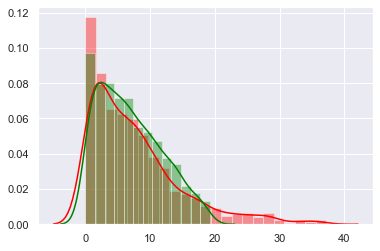

In [37]:
lambd=10
sns.distplot(busstop(lambd), color="red")
sns.distplot(busstop(lambd, expo=False), color="green")

In [44]:
def fanny_mae(data):
    age, wealth, death = 50, 150000, random()
    
    while death > data[age]:
        wealth = wealth + 10000 if age <= 70 else wealth - 65000
        wealth *= 1 + normal(0.08, 0.09)
        age += 1
    return wealth

fmsims = [fanny_mae(data) for i in range(10000)]
print(ss.describe(fmsims))

DescribeResult(nobs=10000, minmax=(-6364048.776432471, 57749639.58241458), mean=3972523.85299854, variance=26808399268326.098, skewness=2.757212101061523, kurtosis=12.907892473660437)


DescribeResult(nobs=10000, minmax=(-6364048.776432471, 57749639.58241458), mean=3972523.85299854, variance=26808399268326.098, skewness=2.757212101061523, kurtosis=12.907892473660437)

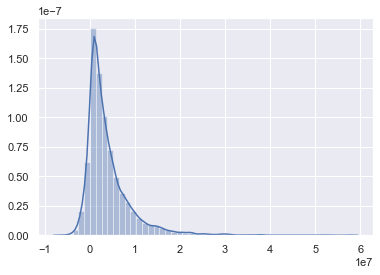

In [47]:
sns.set()
sns.distplot(fmsims, bins=50)
ss.describe(fmsims)

In [46]:
import pymc3 as pm
pm.traceplot(fmsims)


You can find the C code in this temporary file: /var/folders/9m/kc24qj8s20zfv71m1cwk033h0000gn/T/theano_compilation_error_rsz5lzh4


AttributeError: module 'theano' has no attribute 'gof'